In [1]:
# Python versão 3.8.8
# Windows 10

# biblioteca para interação com o sistema
import os
import shutil

# biblioteca para manipulação de dados
import pandas as pd # versão 1.3.2
import numpy as np # versão 1.20.1

# biblioteca para manipulação de banco de dados sqlite
import sqlite3 # versão 2.6.0
from sqlite3 import Error

import researchpy as rp

# biblioteca para visualização
import plotly.express as px # versão 5.3.1
import seaborn as sns # versão 0.11.1

import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

import matplotlib.pyplot as plt  # versão 3.3.4

In [2]:
from matplotlib import rcParams
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold  
from IPython.display import Image  

In [3]:
#bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import classification_report

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

from sklearn import metrics 

In [4]:
from category_encoders import TargetEncoder

In [5]:
# Endereço do diretório onde se encontra o script python
diretorio_atual = os.path.dirname(os.path.realpath('__file__')) + "\\"

# Nome do Banco de Dados de onde serão importadas as tabelas
nome_bd = "Enade_DW.sqlite"

In [6]:
def nova_conexao(path, nome_bd):

    conec_bd = None
    try:
        conec_bd = sqlite3.connect(path + nome_bd)

    except Error as erro:
        print(erro)
        return 0
    
    finally:
        if conec_bd:
            conec_bd.close()
    return 1

In [7]:
#Definindo função para plotar grafico de comparação
def grafico(previsto,real,nome):
    previsto = np.array(previsto)
    real = np.array(real)
    
    mape = mean_absolute_error(real,previsto)
    
    y1 = previsto[:50]
    x1 = range(len(y1))
    y2 = real[:50]
    x2 = range(len(y2))
    

    plt.title('Gráfico de Predições:'+nome)
    plt.xlabel('mape: '+str(mape))
    plt.ylabel('Valores')

    plt.plot(x1,y1,color='#D90286',linestyle='--',label='Predita')
    plt.plot(x2,y2,color='#0864AD',linestyle='-.', label = 'Esperada')
    plt.legend()
    plt.show()

In [8]:
# Ininia a Conexão
if (nova_conexao(diretorio_atual,  nome_bd)):
    conec_bd = sqlite3.connect(diretorio_atual + nome_bd)
    cursor = conec_bd.cursor()
    print("Conexão ao banco '{}' criada com sucesso.\n".format(nome_bd))
    print("-" * 90)
    conec_bd.commit()

# Importa tabelas do Banco de Dados
print(f"Importando tabelas do Banco de Dados{nome_bd}...", end="\r", flush=True)

dim_aluno_econ = pd.read_sql_query('SELECT * FROM DIM_ALUNO_ECON ', conec_bd, index_col ='ID_ALUNO_ECONOMICO')
dim_curso = pd.read_sql_query('SELECT * FROM DIM_CURSO ', conec_bd, index_col ='ID_CURSO')
dim_ensino_medio = pd.read_sql_query('SELECT * FROM DIM_ENSINO_MEDIO ', conec_bd, index_col ='ID_ALUNO_ENSINO_MEDIO')
dim_formacao_familiares = pd.read_sql_query('SELECT * FROM DIM_FORMACAO_FAMILIARES ', conec_bd, index_col ='ID_FORMACAO_FAMILIA')
dim_ies = pd.read_sql_query('SELECT * FROM DIM_IES ', conec_bd, index_col ='ID_IES_ANO')
dim_info_aluno = pd.read_sql_query('SELECT * FROM DIM_INFO_ALUNO ', conec_bd, index_col ='ID_ALUNO_INFO')
dim_oportunidades = pd.read_sql_query('SELECT * FROM DIM_OPORTUNIDADES ', conec_bd, index_col ='ID_OPORTUNIDADES')
dim_percepcao_prova = pd.read_sql_query('SELECT * FROM DIM_PERCEPCAO_PROVA ', conec_bd, index_col ='ID_PERCEPCAO_PROVA')
dim_presenca = pd.read_sql_query('SELECT * FROM DIM_PRESENCA ', conec_bd, index_col ='ID_PRESENCA')
dim_regiao = pd.read_sql_query('SELECT * FROM DIM_REGIAO ', conec_bd, index_col ='CO_MUNIC_CURSO')
dim_tempo = pd.read_sql_query('SELECT * FROM DIM_TEMPO ', conec_bd, index_col ='ID_TEMPO')
fato_prova = pd.read_sql_query('SELECT * FROM FATO_PROVA ', conec_bd, index_col ='ID_PROVA')

print(f"Tabelas importadas com Sucesso.\n                     ")
print("-" * 90)

# Encerra a Conexão
conec_bd.close()
print(f"Conexão ao banco '{nome_bd}' encerrada com sucesso.\n")

Conexão ao banco 'Enade_DW.sqlite' criada com sucesso.

------------------------------------------------------------------------------------------
Tabelas importadas com Sucesso.DadosEnade_DW.sqlite...
                     
------------------------------------------------------------------------------------------
Conexão ao banco 'Enade_DW.sqlite' encerrada com sucesso.



In [9]:
# União de todas as dimensões com a Tabela Fato
df_completo = fato_prova.merge(dim_info_aluno, how = "left", left_on = "ID_ALUNO_INFO" , right_index = True)

df_completo = df_completo.merge(dim_aluno_econ, how = 'left', left_on = 'ID_ALUNO_ECONOMICO' , right_index = True)
df_completo = df_completo.merge(dim_curso, how = 'left', left_on = 'ID_CURSO' , right_index = True)
df_completo = df_completo.merge(dim_ensino_medio, how = 'left', left_on = 'ID_ALUNO_ENSINO_MEDIO' , right_index = True)
df_completo = df_completo.merge(dim_formacao_familiares, how = 'left', left_on = 'ID_FORMACAO_FAMILIA' , right_index = True)
df_completo = df_completo.merge(dim_ies, how = 'left', left_on = 'ID_IES_ANO' , right_index = True)
df_completo = df_completo.merge(dim_oportunidades, how = 'left', left_on = 'ID_OPORTUNIDADES' , right_index = True)
df_completo = df_completo.merge(dim_percepcao_prova, how = 'left', left_on = 'ID_PERCEPCAO_PROVA' , right_index = True)
df_completo = df_completo.merge(dim_presenca, how = 'left', left_on = 'ID_PRESENCA' , right_index = True)
df_completo = df_completo.merge(dim_regiao, how = 'left', left_on = 'CO_MUNIC_CURSO' , right_index = True)
df_completo = df_completo.merge(dim_tempo, how = 'left', left_on = 'ID_TEMPO' , right_index = True)

In [10]:
# Remoção das colunas Chaves
df_completo = df_completo.drop(['ID_ALUNO_ECONOMICO',
                                'ID_CURSO',
                                'ID_ALUNO_ENSINO_MEDIO',
                                'ID_FORMACAO_FAMILIA',
                                'ID_IES_ANO',
                                'ID_ALUNO_INFO',
                                'ID_OPORTUNIDADES',
                                'ID_PERCEPCAO_PROVA',
                                'ID_PRESENCA',
                                'CO_MUNIC_CURSO',
                                'ID_TEMPO'], axis = 1)

In [11]:
df_completo.shape

(1291771, 42)

In [12]:
df_completo_backup = df_completo.copy()

# Modelos

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
df_completo = df_completo_backup.copy()

### Tempo de Prova

In [15]:
dicionario_resposta = {'Não respondeu ' : 1.5,
                         "Resposta anulada": 2}

df_completo = df_completo.replace({"TEMPO_GASTO_PROVA": dicionario_resposta})
df_completo.TEMPO_GASTO_PROVA = df_completo.TEMPO_GASTO_PROVA.astype(float)

### Horas de Trabalho

In [16]:
dicionario_resposta = {'Trabalho 40 horas semanais ou mais.' : 40,
                       'Trabalho até 20 horas semanais.': 20,
                       'Não estou trabalhando.': 0,
                       'Trabalho de 21 a 39 horas semanais.': 30,
                       'Trabalho eventualmente.': 5
                      }

df_completo = df_completo.replace({"HORAS_TRABALHO": dicionario_resposta})
df_completo.HORAS_TRABALHO = df_completo.HORAS_TRABALHO.astype(float)

### Avaliacao CE

In [17]:
dicionario_resposta = {'Resposta anulada': 0,
                       'Muito difícil': 0,
                       'Difícil': 3,
                       'Não respondeu ': 2,
                       'Médio': 5,
                       'Fácil': 6,
                       'Muito fácil': 1
                      }

df_completo = df_completo.replace({"GRAU_DIFICULDADE_CE": dicionario_resposta})
df_completo.GRAU_DIFICULDADE_CE = df_completo.GRAU_DIFICULDADE_CE.astype(float)

df_completo = df_completo.replace({"GRAU_DIFICULDADE_FG": dicionario_resposta})
df_completo.GRAU_DIFICULDADE_FG = df_completo.GRAU_DIFICULDADE_FG.astype(float)

### Moram Junto

In [18]:
dicionario_resposta = {'Nenhuma': 0,
                       'Uma': 1,
                       'Duas': 2,
                       'Três': 3,
                       'Quatro': 4,
                       'Cinco': 5,
                       'Seis': 6,
                       'Sete ou mais': 9
                      }

df_completo = df_completo.replace({"PESSOAS_MORAM_JUNTO": dicionario_resposta})
df_completo.PESSOAS_MORAM_JUNTO = df_completo.PESSOAS_MORAM_JUNTO.astype(float)


### Renda Familiar

In [19]:
dicionario_resposta = {'Até 1,5 salário mínimo': 0.8,
                       'De 1,5 a 3 salários mínimos': 2,
                       'De 3 a 4,5 salários mínimos': 3.5,
                       'De 4,5 a 6 salários mínimos': 5,
                       'De 6 a 10 salários mínimos': 7.5,
                       'De 10 a 30 salários mínimos': 20,
                       'Acima de 30 salários mínimos': 35
                      }


df_completo = df_completo.replace({"RENDA_FAMILIAR": dicionario_resposta})
df_completo.RENDA_FAMILIAR = df_completo.RENDA_FAMILIAR.astype(float)

### Renda Familiar Per Capita

In [20]:
df_completo["RENDA_PER_CAPITA"] = df_completo.RENDA_FAMILIAR/(df_completo.PESSOAS_MORAM_JUNTO +1)

### Familiar Graduado

In [21]:
df_completo['FAMILIAR_GRADUADO'] = np.where(df_completo['FAMILIAR_GRADUADO'] == 'Sim', 1, 0)

### Modalidade

In [22]:
df_completo['MODALIDADE_CURSO'] = np.where(df_completo['MODALIDADE_CURSO'] == 'Educação Presencial', 1, 0)

df_completo.MODALIDADE_CURSO = df_completo.MODALIDADE_CURSO.astype(int)

### Naturalidade

In [23]:
df_completo['NACIONALIDADE'] = np.where(df_completo['NACIONALIDADE'] == 'Brasileira', 1, 0)

df_completo.NACIONALIDADE = df_completo.NACIONALIDADE.astype(int)

### Colunas Categóricas Restantes - Mean Encoding

In [24]:
# Enconding da coluna TP_SEXO
encoder = TargetEncoder()
df_completo['TP_SEXO'] = encoder.fit_transform(df_completo['TP_SEXO'], df_completo['NT_GER'])
df_completo['TP_SEXO'] = encoder.fit_transform(df_completo['TP_SEXO'], df_completo['NT_GER'])

# Enconding da coluna ESTADO_CIVIL
encoder = TargetEncoder()
df_completo['ESTADO_CIVIL'] = encoder.fit_transform(df_completo['ESTADO_CIVIL'], df_completo['NT_GER'])
df_completo['ESTADO_CIVIL'] = encoder.fit_transform(df_completo['ESTADO_CIVIL'], df_completo['NT_GER'])

# Enconding da coluna RAÇA
encoder = TargetEncoder()
df_completo['RAÇA'] = encoder.fit_transform(df_completo['RAÇA'], df_completo['NT_GER'])
df_completo['RAÇA'] = encoder.fit_transform(df_completo['RAÇA'], df_completo['NT_GER'])

# Enconding da coluna AUXILIO_RECEBIDO
encoder = TargetEncoder()
df_completo['AUXILIO_RECEBIDO'] = encoder.fit_transform(df_completo['AUXILIO_RECEBIDO'], df_completo['NT_GER'])
df_completo['AUXILIO_RECEBIDO'] = encoder.fit_transform(df_completo['AUXILIO_RECEBIDO'], df_completo['NT_GER'])

# Enconding da coluna ENTROU_POR_COTA
encoder = TargetEncoder()
df_completo['ENTROU_POR_COTA'] = encoder.fit_transform(df_completo['ENTROU_POR_COTA'], df_completo['NT_GER'])
df_completo['ENTROU_POR_COTA'] = encoder.fit_transform(df_completo['ENTROU_POR_COTA'], df_completo['NT_GER'])

# Enconding da coluna GRUPO_CURSO
encoder = TargetEncoder()
df_completo['GRUPO_CURSO'] = encoder.fit_transform(df_completo['GRUPO_CURSO'], df_completo['NT_GER'])
df_completo['GRUPO_CURSO'] = encoder.fit_transform(df_completo['GRUPO_CURSO'], df_completo['NT_GER'])

# Enconding da coluna TIPO_ESCOLA_EM
encoder = TargetEncoder()
df_completo['TIPO_ESCOLA_EM'] = encoder.fit_transform(df_completo['TIPO_ESCOLA_EM'], df_completo['NT_GER'])
df_completo['TIPO_ESCOLA_EM'] = encoder.fit_transform(df_completo['TIPO_ESCOLA_EM'], df_completo['NT_GER'])

# Enconding da coluna MODALIDADE_EM
encoder = TargetEncoder()
df_completo['MODALIDADE_EM'] = encoder.fit_transform(df_completo['MODALIDADE_EM'], df_completo['NT_GER'])
df_completo['MODALIDADE_EM'] = encoder.fit_transform(df_completo['MODALIDADE_EM'], df_completo['NT_GER'])

# Enconding da coluna ESCOLARIZACAO_PAI
encoder = TargetEncoder()
df_completo['ESCOLARIZACAO_PAI'] = encoder.fit_transform(df_completo['ESCOLARIZACAO_PAI'], df_completo['NT_GER'])
df_completo['ESCOLARIZACAO_PAI'] = encoder.fit_transform(df_completo['ESCOLARIZACAO_PAI'], df_completo['NT_GER'])

# Enconding da coluna ESCOLARIZACAO_MAE
encoder = TargetEncoder()
df_completo['ESCOLARIZACAO_MAE'] = encoder.fit_transform(df_completo['ESCOLARIZACAO_MAE'], df_completo['NT_GER'])
df_completo['ESCOLARIZACAO_MAE'] = encoder.fit_transform(df_completo['ESCOLARIZACAO_MAE'], df_completo['NT_GER'])

# Enconding da coluna NOME_IES
encoder = TargetEncoder()
df_completo['NOME_IES'] = encoder.fit_transform(df_completo['NOME_IES'], df_completo['NT_GER'])
df_completo['NOME_IES'] = encoder.fit_transform(df_completo['NOME_IES'], df_completo['NT_GER'])

# Enconding da coluna CATEGORIA_IES
encoder = TargetEncoder()
df_completo['CATEGORIA_IES'] = encoder.fit_transform(df_completo['CATEGORIA_IES'], df_completo['NT_GER'])
df_completo['CATEGORIA_IES'] = encoder.fit_transform(df_completo['CATEGORIA_IES'], df_completo['NT_GER'])

# Enconding da coluna ORGANIZACAO_IES
encoder = TargetEncoder()
df_completo['ORGANIZACAO_IES'] = encoder.fit_transform(df_completo['ORGANIZACAO_IES'], df_completo['NT_GER'])
df_completo['ORGANIZACAO_IES'] = encoder.fit_transform(df_completo['ORGANIZACAO_IES'], df_completo['NT_GER'])

# Enconding da coluna ATIVIDADES_CURRICURALES_EXTERIOR
encoder = TargetEncoder()
df_completo['ATIVIDADES_CURRICURALES_EXTERIOR'] = encoder.fit_transform(df_completo['ATIVIDADES_CURRICURALES_EXTERIOR'], df_completo['NT_GER'])
df_completo['ATIVIDADES_CURRICURALES_EXTERIOR'] = encoder.fit_transform(df_completo['ATIVIDADES_CURRICURALES_EXTERIOR'], df_completo['NT_GER'])

# Enconding da coluna IDIOMA_ESTRANGEIRO
encoder = TargetEncoder()
df_completo['IDIOMA_ESTRANGEIRO'] = encoder.fit_transform(df_completo['IDIOMA_ESTRANGEIRO'], df_completo['NT_GER'])
df_completo['IDIOMA_ESTRANGEIRO'] = encoder.fit_transform(df_completo['IDIOMA_ESTRANGEIRO'], df_completo['NT_GER'])

# Enconding da coluna EXTENSAO_UNIVERSITARIA
encoder = TargetEncoder()
df_completo['EXTENSAO_UNIVERSITARIA'] = encoder.fit_transform(df_completo['EXTENSAO_UNIVERSITARIA'], df_completo['NT_GER'])
df_completo['EXTENSAO_UNIVERSITARIA'] = encoder.fit_transform(df_completo['EXTENSAO_UNIVERSITARIA'], df_completo['NT_GER'])

# Enconding da coluna ATIVIDADES_INVESTIGACAO_ACADEMICA
encoder = TargetEncoder()
df_completo['ATIVIDADES_INVESTIGACAO_ACADEMICA'] = encoder.fit_transform(df_completo['ATIVIDADES_INVESTIGACAO_ACADEMICA'], df_completo['NT_GER'])
df_completo['ATIVIDADES_INVESTIGACAO_ACADEMICA'] = encoder.fit_transform(df_completo['ATIVIDADES_INVESTIGACAO_ACADEMICA'], df_completo['NT_GER'])

# Enconding da coluna INTERCAMBIO_ESTAGIO_PAIS
encoder = TargetEncoder()
df_completo['INTERCAMBIO_ESTAGIO_PAIS'] = encoder.fit_transform(df_completo['INTERCAMBIO_ESTAGIO_PAIS'], df_completo['NT_GER'])
df_completo['INTERCAMBIO_ESTAGIO_PAIS'] = encoder.fit_transform(df_completo['INTERCAMBIO_ESTAGIO_PAIS'], df_completo['NT_GER'])

# Enconding da coluna INTERCAMBIO_ESTAGIO_FORA_DO_PAIS
encoder = TargetEncoder()
df_completo['INTERCAMBIO_ESTAGIO_FORA_DO_PAIS'] = encoder.fit_transform(df_completo['INTERCAMBIO_ESTAGIO_FORA_DO_PAIS'], df_completo['NT_GER'])
df_completo['INTERCAMBIO_ESTAGIO_FORA_DO_PAIS'] = encoder.fit_transform(df_completo['INTERCAMBIO_ESTAGIO_FORA_DO_PAIS'], df_completo['NT_GER'])

# Enconding da coluna PERCEPCAO_ESTUDO_CONTEUDO
encoder = TargetEncoder()
df_completo['PERCEPCAO_ESTUDO_CONTEUDO'] = encoder.fit_transform(df_completo['PERCEPCAO_ESTUDO_CONTEUDO'], df_completo['NT_GER'])
df_completo['PERCEPCAO_ESTUDO_CONTEUDO'] = encoder.fit_transform(df_completo['PERCEPCAO_ESTUDO_CONTEUDO'], df_completo['NT_GER'])

# Enconding da coluna NOME_MUNICIPIO
encoder = TargetEncoder()
df_completo['NOME_MUNICIPIO'] = encoder.fit_transform(df_completo['NOME_MUNICIPIO'], df_completo['NT_GER'])
df_completo['NOME_MUNICIPIO'] = encoder.fit_transform(df_completo['NOME_MUNICIPIO'], df_completo['NT_GER'])

# Enconding da coluna UF
encoder = TargetEncoder()
df_completo['UF'] = encoder.fit_transform(df_completo['UF'], df_completo['NT_GER'])
df_completo['UF'] = encoder.fit_transform(df_completo['UF'], df_completo['NT_GER'])

# Enconding da coluna REGIAO_CURSO
encoder = TargetEncoder()
df_completo['REGIAO_CURSO'] = encoder.fit_transform(df_completo['REGIAO_CURSO'], df_completo['NT_GER'])
df_completo['REGIAO_CURSO'] = encoder.fit_transform(df_completo['REGIAO_CURSO'], df_completo['NT_GER'])

### NOTA MAIOR QUE A NOTA MÉDIA DO ANO

In [25]:
df_completo['NOTA_MEDIA_ANO'] = df_completo.groupby(['ANO'])['NT_GER'].transform('mean')
df_completo["MAIOR_QUE_NOTA_MEDIA_ANO"] = df_completo['NT_GER'] > df_completo['NOTA_MEDIA_ANO']

## Modelo - Random Forest

In [26]:
dataset_modelo = df_completo.select_dtypes(include=["number","bool_"]).drop(['NT_FG', 'NT_CE', 'NT_GER',
                                                                             'PESSOAS_MORAM_JUNTO', 'RENDA_FAMILIAR', 
                                                                             'NOTA_MEDIA_ANO'], axis = 1).copy()

In [27]:
y = dataset_modelo["MAIOR_QUE_NOTA_MEDIA_ANO"]
dataset_modelo = dataset_modelo.drop("MAIOR_QUE_NOTA_MEDIA_ANO", 
                                     axis = 1)

In [28]:
#split de dados
x_treino, x_teste, y_treino, y_teste = train_test_split(dataset_modelo, y, test_size  = 0.1, shuffle = True)

rfc = RandomForestClassifier(n_estimators = 5, random_state=0, criterion = "entropy", max_depth = 11)
rfc.fit(x_treino, y_treino)


y_pred = rfc.predict(x_teste)

acuracia = metrics.accuracy_score(y_teste, y_pred)
print(f"A Acurácia do modelo é de: {acuracia}")

precisao = metrics.precision_score(y_teste, y_pred)
print(f"A Precisão do modelo é de: {precisao}")

A Acurácia do modelo é de: 0.6946151821517595
A Precisão do modelo é de: 0.6983859020516442


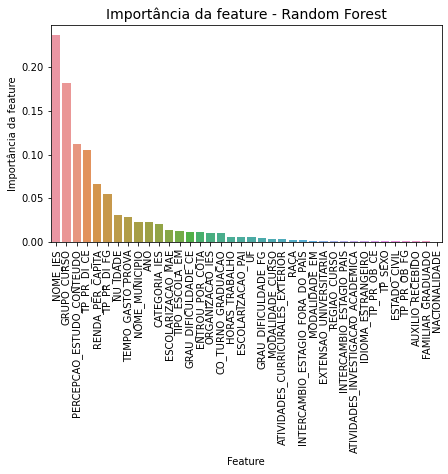

In [29]:
tmp = pd.DataFrame({'Feature': dataset_modelo.columns.to_list(), 
                    'Importância da feature': rfc.feature_importances_})

tmp = tmp.sort_values(by='Importância da feature',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância da feature - Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Importância da feature',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

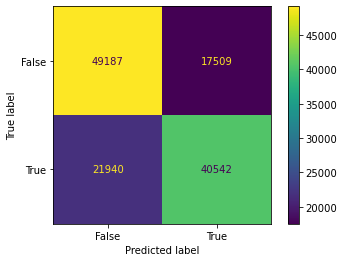

In [30]:
plot_confusion_matrix(rfc,  x_teste, y_teste, values_format = '.0f')  
plt.show()
plt.rcParams["figure.figsize"] = (80,14)

In [31]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

       False       0.69      0.74      0.71     66696
        True       0.70      0.65      0.67     62482

    accuracy                           0.69    129178
   macro avg       0.69      0.69      0.69    129178
weighted avg       0.69      0.69      0.69    129178



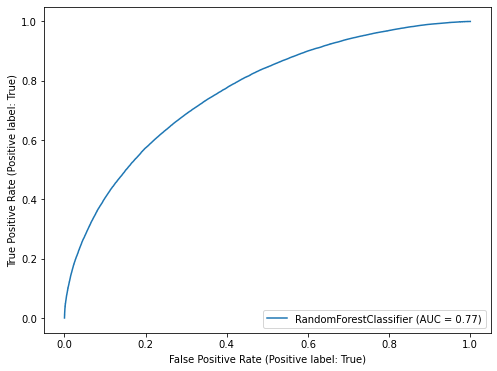

In [32]:
plt.rcParams["figure.figsize"] = (8,6)
metrics.plot_roc_curve(rfc,  x_teste, y_teste) 

In [33]:
PAROU

NameError: name 'PAROU' is not defined

## Modelo após remoção de Colunas com baixa importancia

In [ ]:
tmp[tmp["Importância da feature"]<0.001].Feature.to_list()

In [ ]:
dataset_modelo_2 = dataset_modelo.drop(['TP_PR_OB_FG', 'FAMILIAR_GRADUADO', 'AUXILIO_RECEBIDO', 'NACIONALIDADE',
                                       'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE'], 
                                     axis = 1)

In [ ]:
#split de dados
x_treino, x_teste, y_treino, y_teste = train_test_split(dataset_modelo_2, y, test_size  = 0.1, shuffle = True)

rfc = RandomForestClassifier(n_estimators = 5, random_state=0, criterion = "entropy", max_depth = 11)
rfc.fit(x_treino, y_treino)


y_pred = rfc.predict(x_teste)

acuracia = metrics.accuracy_score(y_teste, y_pred)
print(f"A Acurácia do modelo é de: {acuracia}")

precisao = metrics.precision_score(y_teste, y_pred)
print(f"A Precisão do modelo é de: {precisao}")

In [ ]:
tmp = pd.DataFrame({'Feature': dataset_modelo_2.columns.to_list(), 
                    'Importância da feature': rfc.feature_importances_})

tmp = tmp.sort_values(by='Importância da feature',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Importância da feature - Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Importância da feature',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
plot_confusion_matrix(rfc,  x_teste, y_teste, values_format = '.0f')  
plt.show()
plt.rcParams["figure.figsize"] = (80,14)

In [ ]:
print(classification_report(y_teste, y_pred))

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
metrics.plot_roc_curve(rfc,  x_teste, y_teste) 

In [35]:
!jupyter --version

jupyter core     : 4.7.1
jupyter-notebook : 6.3.0
qtconsole        : 5.0.3
ipython          : 7.22.0
ipykernel        : 5.3.4
jupyter client   : 6.1.12
jupyter lab      : 3.0.14
nbconvert        : 6.0.7
ipywidgets       : 7.6.3
nbformat         : 5.1.3
traitlets        : 5.0.5
